# 🏡 House Prices - Exploratory Data Analysis (EDA) and Data Preparation

## 📌 Project Objective
This notebook performs a detailed **Exploratory Data Analysis (EDA)** and **data preparation** on the Ames Housing dataset.  
The aim is to understand how different features influence house prices and to prepare the data for machine learning modeling.

Our goals in this notebook are:
- Understand the dataset and key variables.
- Explore and visualize the target variable `SalePrice`.
- Analyze the effect of important features like `Overall Quality`, `GarageCars`, `GrLivArea`, and `Neighborhood` on house prices.
- Handle outliers and assess the distribution of important variables.
- Prepare the target variable for modeling (including handling skewness if needed).

---

## 📂 Dataset Information

### Expected Files:
- `train.csv` — Training dataset containing house features and sale prices.
- `test.csv` — Test dataset (used later for predictions, optional for EDA).

⚠️ **Note:**  
To keep this notebook **clean and easy to use**, we assume that these files are located in the **same directory as this notebook**.

If your files are stored elsewhere, you can adjust the paths in the code accordingly.

---

## ✅ How to Use this Notebook

- **If running locally**: Ensure that `train.csv` and `test.csv` are in the same folder as this notebook.
- **If running on Kaggle/Colab**: Adjust file paths if needed based on where the dataset is uploaded.
- All visualizations and analyses are designed to be **reproducible and easy to follow**.

---

## 🚀 Let's dive into the data!


1. Load the libraries 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

2. ## 📂 Loading the Data

To keep this notebook flexible and easy to run, we assume that the `train.csv` and `test.csv` files are located in the **same directory** as this notebook.  
If you store them elsewhere, please adjust the paths accordingly.

### Expected Files:
- `train.csv`
- `test.csv`

If you prefer, you can modify the code to specify a custom directory.


In [ ]:
data_path = input("Enter path to data files (or leave empty if in same directory): ") or "."
train_df = pd.read_csv(f"{data_path}/train.csv")
test_df = pd.read_csv(f"{data_path}/test.csv")



3. EXPLORE THE DATA:
.shape -> (rows, columns)

In [17]:
print(train_df.shape)
print(train_df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

There are total of 1460 samples which can be used to train a model, 80 features and 1 target variable

.describe() -> gives some useful stats 

In [18]:
print(train_df.describe())
print(train_df.head())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

4. Explore the target variable. Univariate analysis: how one single variable is distributedin a numeric range. Is it positively skewed or negatively

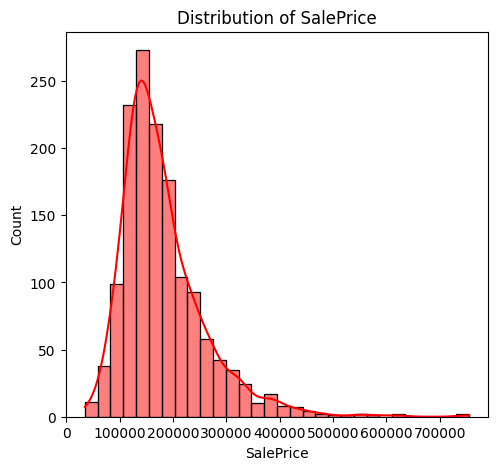

In [19]:
plt.figure(figsize=(12, 5))

# Histogram of SalePrice
plt.subplot(1, 2, 1)
sns.histplot(train_df["SalePrice"], bins=30, kde=True, color="red")
plt.title("Distribution of SalePrice")

plt.show()

In [20]:
saleprice_skewness = skew(train_df["SalePrice"])
print(f"Skewness of SalePrice: {saleprice_skewness:.2f}")


Skewness of SalePrice: 1.88


🔍 Interpretation of Skewness = 1.56
- Skewness > 1 indicates that SalePrice is right-skewed (long tail on the right).
- 1.56 is moderately high, meaning there are some very expensive houses pulling the average up.
- A log transformation is recommended to make the distribution more normal.

In [21]:
train_df["SalePrice_log"] = np.log1p(train_df["SalePrice"])

saleprice_log_skewness = skew(train_df["SalePrice_log"])
print(f"Skewness of Log-Transformed SalePrice: {saleprice_log_skewness:.2f}")

Skewness of Log-Transformed SalePrice: 0.12


# 📌 Understanding Kurtosis
Kurtosis is a statistical measure that describes the **shape of a distribution’s tails** compared to a normal distribution. It helps identify whether the data has **extreme outliers**.

---

## **1️⃣ Types of Kurtosis**
| **Type** | **Kurtosis Value** | **Description** |
|----------|--------------------|----------------|
| **Mesokurtic (Normal Tails)** | `≈ 3` | Similar to a normal distribution, moderate tails. |
| **Leptokurtic (Heavy Tails)** | `> 3` | More outliers, extreme values in the tails. |
| **Platykurtic (Light Tails)** | `< 3` | Fewer outliers, data is more evenly spread. |

---

## **2️⃣ Why Does Kurtosis Matter?**
- **High kurtosis (`>3`)** → Suggests that the data has **many extreme outliers**.
- **Low kurtosis (`<3`)** → Implies a **lack of extreme values** (flatter distribution).
- In real estate data, **high kurtosis** often means **a few expensive homes significantly increase the average price**.



In [22]:
saleprice_kurtosis = kurtosis(train_df["SalePrice"], fisher = True)
print(f"Kurtosis of SalePrice: {saleprice_kurtosis:.2f}")

Kurtosis of SalePrice: 6.51


In [23]:
upperlimit = int(np.percentile(train_df["SalePrice"].values, 99.5))
train_df.loc[train_df["SalePrice"] > upperlimit, "SalePrice"] = upperlimit
print(f"New max SalePrice after Winsorization: {train_df['SalePrice'].max()}")

New max SalePrice after Winsorization: 527331


5. Check for missing values

In [24]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageYrBlt       81
GarageFinish      81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64


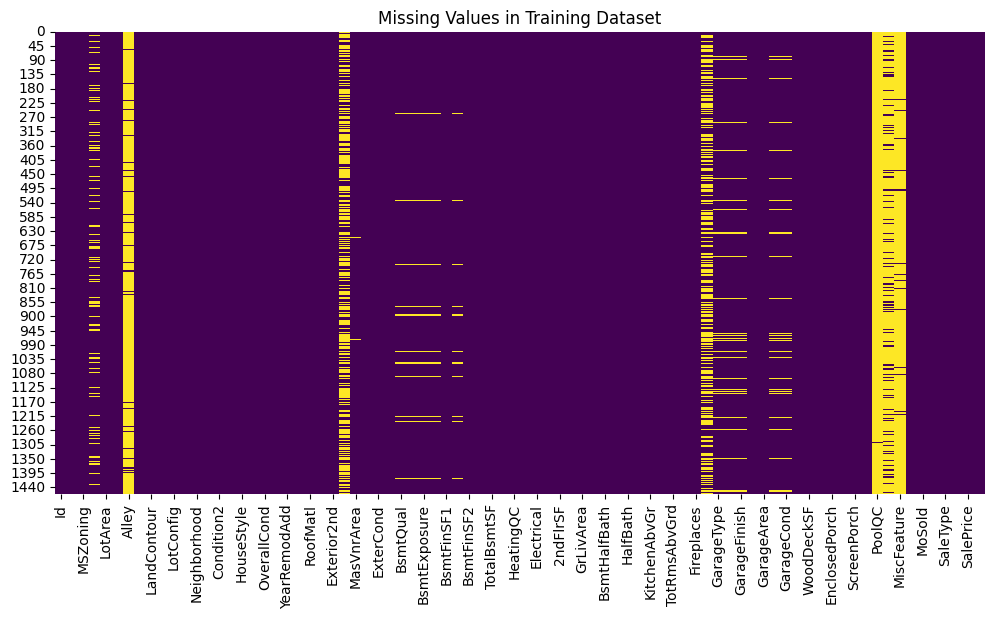

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Dataset")
plt.show()

Let's impute categorical features with "NONE" 

In [26]:
cat_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

train_df[cat_cols] = train_df[cat_cols].fillna("None")

Since "Alley" , "PoolQC" and "MiscFeature" contain too many missing values (more than 94%) best strategy is to drop the features unless the hold meaning.

In [27]:
drop_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']
train_df.drop(columns=drop_cols, inplace=True)

Let's use localised median to impute "LotFrontage" by "Neighborhood". copy the before so we can plot and compare pre and post imputation. 

In [28]:
train_df['LotFrontage_before'] = train_df['LotFrontage'].copy()
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Now plot and comprare the before and after

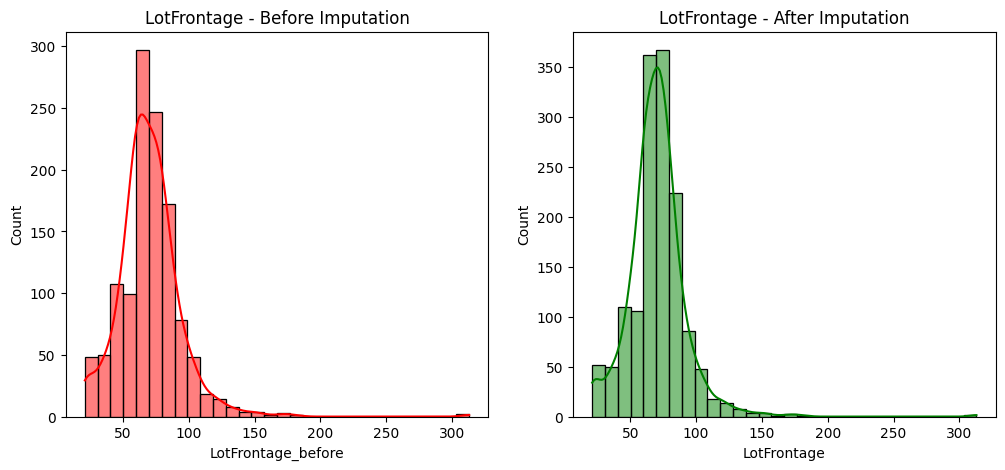

In [29]:

plt.figure(figsize=(12, 5))

# Before Imputation
plt.subplot(1, 2, 1)
sns.histplot(train_df['LotFrontage_before'].dropna(), bins=30, kde=True, color='red')
plt.title('LotFrontage - Before Imputation')

# After Imputation
plt.subplot(1, 2, 2)
sns.histplot(train_df['LotFrontage'], bins=30, kde=True, color='green')
plt.title('LotFrontage - After Imputation')

plt.show()

6. Exploration for feature correlation. Compute a correlation matrix

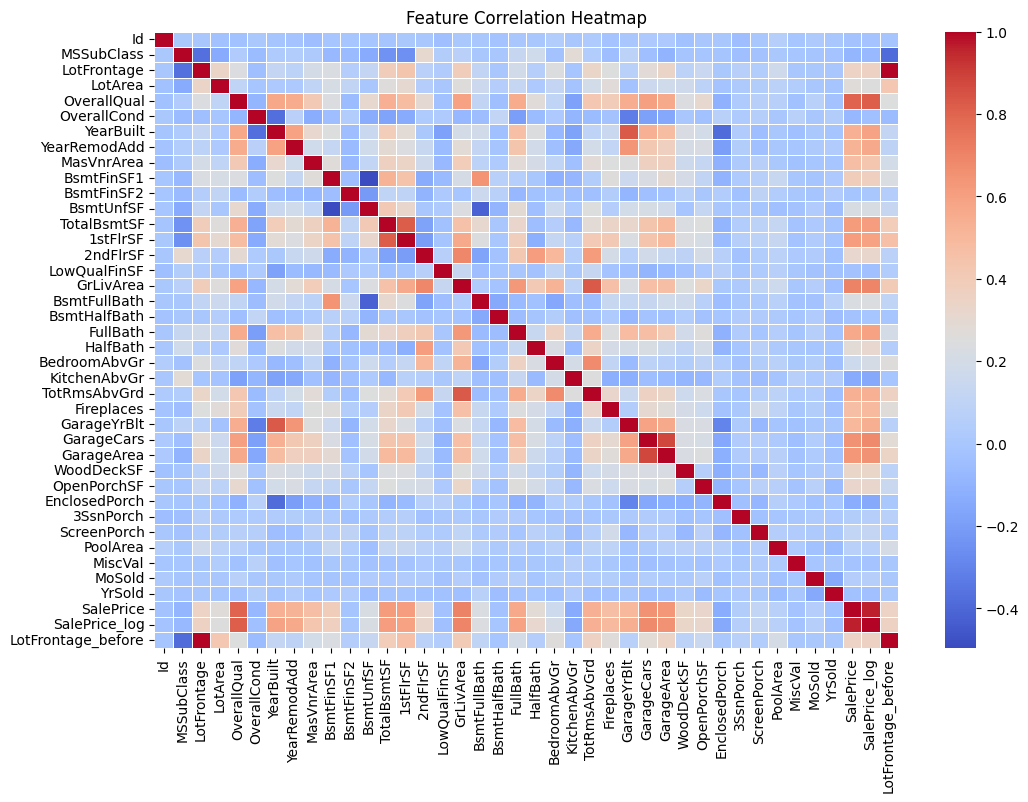

In [30]:
corr_matrix = train_df.corr(numeric_only=True)

#plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
corr=train_df.corr(numeric_only=True)["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

/var/folders/dg/j_kcyvsj1q9b63g75yrkt0y5ny5_9l/T/ipykernel_891/1223700791.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr[np.argsort(corr, axis=0)[::-1]]


SalePrice             1.000000
SalePrice_log         0.959503
OverallQual           0.802340
GrLivArea             0.705461
GarageCars            0.652863
GarageArea            0.635267
TotalBsmtSF           0.617219
1stFlrSF              0.609000
FullBath              0.565596
TotRmsAbvGrd          0.537596
YearBuilt             0.536054
YearRemodAdd          0.521082
GarageYrBlt           0.499518
MasVnrArea            0.473873
Fireplaces            0.472321
BsmtFinSF1            0.384035
LotFrontage_before    0.349992
LotFrontage           0.347730
WoodDeckSF            0.328965
OpenPorchSF           0.324571
2ndFlrSF              0.312753
HalfBath              0.286800
LotArea               0.267056
BsmtFullBath          0.233419
BsmtUnfSF             0.220300
BedroomAbvGr          0.167521
ScreenPorch           0.114528
PoolArea              0.069364
MoSold                0.053503
3SsnPorch             0.047002
BsmtFinSF2           -0.010686
MiscVal              -0.021380
BsmtHalf

## 🔍 Key Takeaways from Correlation Analysis

Understanding the correlation of different features with `SalePrice` is crucial for identifying key predictors of house prices. The analysis reveals several **strongly correlated features** that significantly influence sale price, as well as some **negatively correlated features** that may reduce value.

### ✅ Strongest Positive Correlations (Highly Predictive Features)
The features with the **strongest positive correlations** indicate what factors drive house prices higher:
- **`OverallQual` (0.79)**: The strongest predictor of price—better quality homes consistently sell for more.
- **`GrLivArea` (0.71)**: Larger above-ground living areas strongly contribute to higher prices.
- **`GarageCars` (0.64) & `GarageArea` (0.62)**: Bigger garages add significant value.
- **`TotalBsmtSF` (0.61)**: Larger basement space is associated with higher house prices.
- **`1stFlrSF` (0.61)**: A larger first floor area correlates well with higher prices.

💡 **Insight**: Buyers place the highest importance on **home quality, spacious interiors, and garage capacity**.

---

### 🔻 Strongest Negative Correlations (Features That Lower Price)
Some features show **negative correlations** with `SalePrice`, suggesting that an increase in these attributes may decrease home value:
- **`KitchenAbvGr` (-0.13)**: More kitchens may indicate a multi-family setup, which tends to be less valuable.
- **`EnclosedPorch` (-0.12)**: Enclosed porches do not add as much value as open ones.
- **`MSSubClass` (-0.08)**: Certain home styles (especially older or unconventional designs) tend to be less valuable.
- **`OverallCond` (-0.08)**: Higher overall condition ratings (frequent repairs) may indicate an older, less desirable home.

💡 **Insight**: Features that **indicate lower desirability** or **less conventional housing structures** tend to negatively impact sale price.

---

### 📌 Conclusion
This correlation analysis provides a clear **roadmap for feature selection** in predictive modeling. The most valuable features—such as **home quality, living space, and garage size**—should be prioritized, while weakly correlated features may be dropped or treated differently. Further analysis will explore **feature interactions, visualizations, and potential outliers** to refine our understanding of house prices.


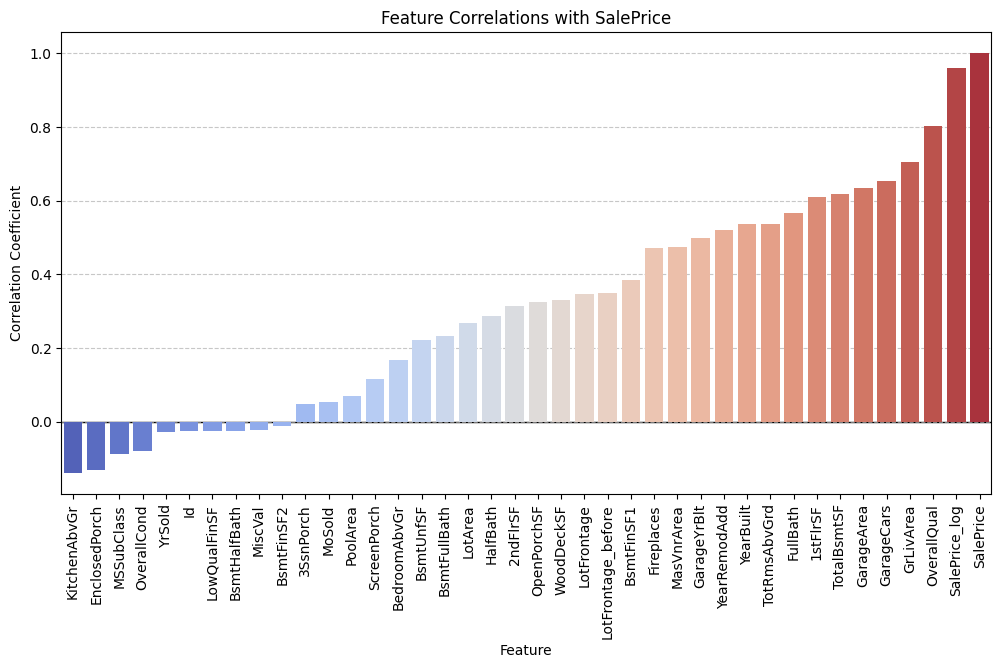

In [32]:
# Compute correlations with SalePrice
corr = train_df.corr(numeric_only=True)["SalePrice"].sort_values()

# Create figure
plt.figure(figsize=(12, 6))

corr_df = corr.reset_index()
corr_df.columns = ["Feature", "Correlation"]

plt.grid(axis="y", linestyle="--", alpha=0.7, zorder=0)
sns.barplot(data=corr_df, x="Feature", y="Correlation", hue="Feature", palette="coolwarm", dodge=False, legend=False, zorder=3)
plt.axhline(0, color='black', linewidth=1, zorder=1) 
plt.xticks(rotation=90)
plt.title("Feature Correlations with SalePrice")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")

plt.show()


7. Lets explore individual feature distributions

GROUND LIVING AREA

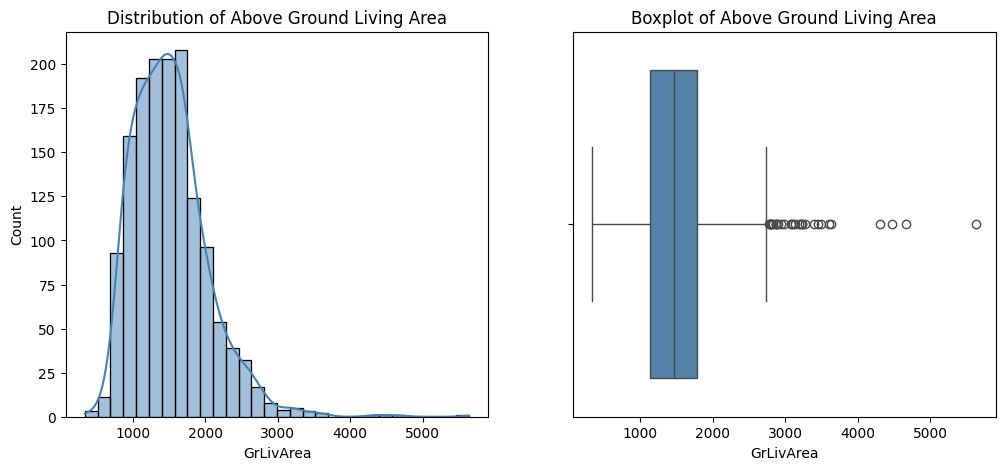

In [33]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_df["GrLivArea"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Above Ground Living Area")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df["GrLivArea"], color="steelblue")
plt.title("Boxplot of Above Ground Living Area")

plt.show()

Analysis of GrLivArea Distribution

1️⃣ Skewness & Distribution (Left - Histogram)
- The data is right-skewed (long tail on the right).
- Most houses have a GrLivArea between 1000 and 2500 sq ft.
- A few extreme values above 4000 sq ft suggest potential outliers.

2️⃣ Presence of Outliers (Right - Boxplot)
- Outliers appear as dots beyond the whiskers on the right.
- Several houses have a GrLivArea above 4000 sq ft, which might distort  predictions.

We need to check if these outliers represent legitimate high-value homes or erroneous data.

# 📌 Outlier Removal Methods
Outliers are extreme values that can **distort analysis and predictions**. While removing outliers can improve model performance, it's important to choose the right method based on the **data distribution and business context**.

---

## **1️⃣ 1.5 * IQR Rule (Standard Approach)**
### 📌 Method:  
- Calculate the **Interquartile Range (IQR)**:  
  - **Q1 (25th percentile)**
  - **Q3 (75th percentile)**
- Define outlier thresholds:  
  - **Lower Bound:** `Q1 - 1.5 * IQR`
  - **Upper Bound:** `Q3 + 1.5 * IQR`
- Remove values outside these bounds.

### 📌 Best for:
- Normally distributed data where extreme values are rare.
- Common statistical approach.

### 📌 Limitation:
- May **remove valid high-value houses** in real estate data.

---

## **2️⃣ 3 * IQR Rule (More Conservative)**
### 📌 Method:
- Similar to the **1.5 * IQR rule**, but with a larger threshold:  
  - **Lower Bound:** `Q1 - 3 * IQR`
  - **Upper Bound:** `Q3 + 3 * IQR`
- Removes **only extreme** outliers.

### 📌 Best for:
- Keeping more data while still **removing extreme values**.
- When the **standard 1.5 * IQR rule removes too much data**.

### 📌 Limitation:
- Some extreme outliers may still remain.

---

## **3️⃣ Z-Score Method (Standard Deviation-Based)**
### 📌 Method:
- Calculate the **Z-score** for each data point:  
  \[
  Z = \frac{{X - \text{Mean}}}{{\text{Standard Deviation}}}
  \]
- Remove points where **`|Z| > 3`** (more than **3 standard deviations from the mean**).

### 📌 Best for:
- Normally distributed data.
- Cases where outliers should be **far from the mean**.

### 📌 Limitation:
- **Not suitable for skewed data**, as standard deviation is sensitive to extreme values.

---

## **4️⃣ Domain-Based Threshold (Real Estate-Specific)**
### 📌 Method:
- Instead of relying on statistics, remove **outliers based on real-world knowledge**.
- Example: If homes larger than **4000 sq ft** are rare in the area, remove them.

### 📌 Best for:
- **Industry-specific** data where extreme values **don't make sense**.
- When a **logical upper/lower limit exists**.

### 📌 Limitation:
- Requires **domain expertise** to define the correct thresholds.



In [34]:
Q1 = train_df["GrLivArea"].quantile(0.25)
Q3 = train_df["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries (1.5 or 3  * IQR rule)
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Find outliers
outliers = train_df[(train_df["GrLivArea"] > upper_bound)]



find out what are the outliers and visualise them in a dotplot

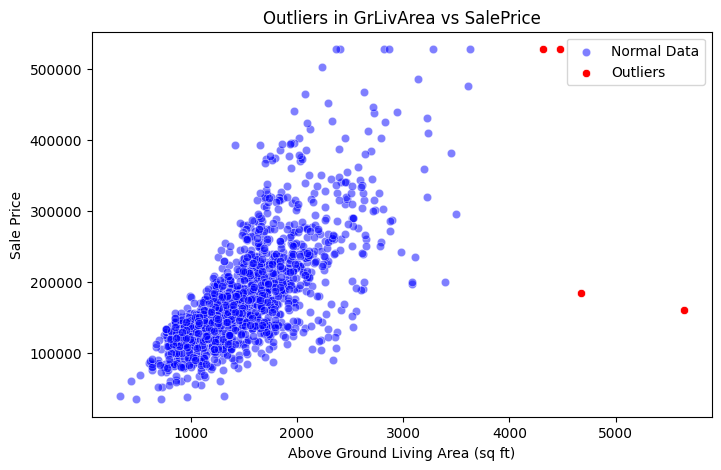

In [40]:
# Scatter plot of GrLivArea vs SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x="GrLivArea", y="SalePrice", color="blue", alpha=0.5, label="Normal Data")
sns.scatterplot(data=outliers, x="GrLivArea", y="SalePrice", color="red", label="Outliers")

plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("Outliers in GrLivArea vs SalePrice")
plt.legend()
plt.show()

Filter the dataset to keep only values within bounds and check new dataset size

In [36]:
train_df = train_df[(train_df["GrLivArea"] >= lower_bound) & (train_df["GrLivArea"] <= upper_bound)]
print("New dataset size after removing extreme outliers:", train_df.shape)

New dataset size after removing extreme outliers: (1456, 79)


OVERALL QUALITY

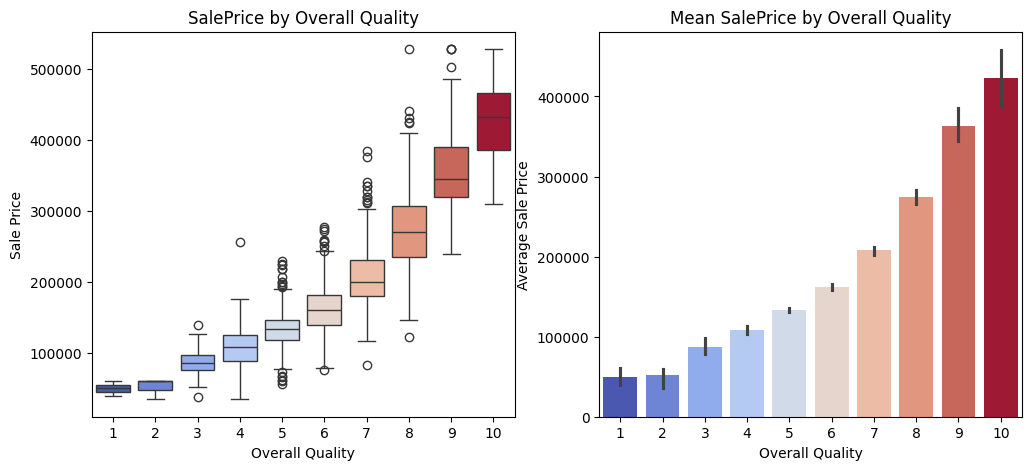

In [41]:
plt.figure(figsize=(12, 5))

# Boxplot: SalePrice vs OverallQual 
plt.subplot(1, 2, 1)
sns.boxplot(data=train_df, x="OverallQual", y="SalePrice", hue="OverallQual", palette="coolwarm", legend=False)
plt.title("SalePrice by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")

# Bar Plot: Mean SalePrice for Each OverallQual 
plt.subplot(1, 2, 2)
sns.barplot(data=train_df, x="OverallQual", y="SalePrice", hue="OverallQual", estimator=np.mean, palette="coolwarm", legend=False)
plt.title("Mean SalePrice by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Average Sale Price")

plt.show()


FIREPLACES

In [38]:
fireplace_analysis = train_df[['Fireplaces','SalePrice']].groupby(['Fireplaces'], as_index=False).mean().sort_values(by='Fireplaces', ascending=False)
print("Average SalePrice by Number of Fireplaces:")
display(fireplace_analysis)

Average SalePrice by Number of Fireplaces:


,Fireplaces,SalePrice
3,3,275000.000000
2,2,230581.300885
1,1,211587.983051
0,0,141331.482609


GARAGESCARS

In [39]:
garage_analysis = train_df[['GarageCars','SalePrice']].groupby(['GarageCars'], as_index=False).mean().sort_values(by='GarageCars', ascending=False)
print("\nAverage SalePrice by Number of Garage Cars:")
display(garage_analysis)


Average SalePrice by Number of Garage Cars:


,GarageCars,SalePrice
4,4,192655.800000
3,3,303675.297753
2,2,183880.645200
1,1,128116.688347
0,0,103317.283951


NEIGBOURHOOD

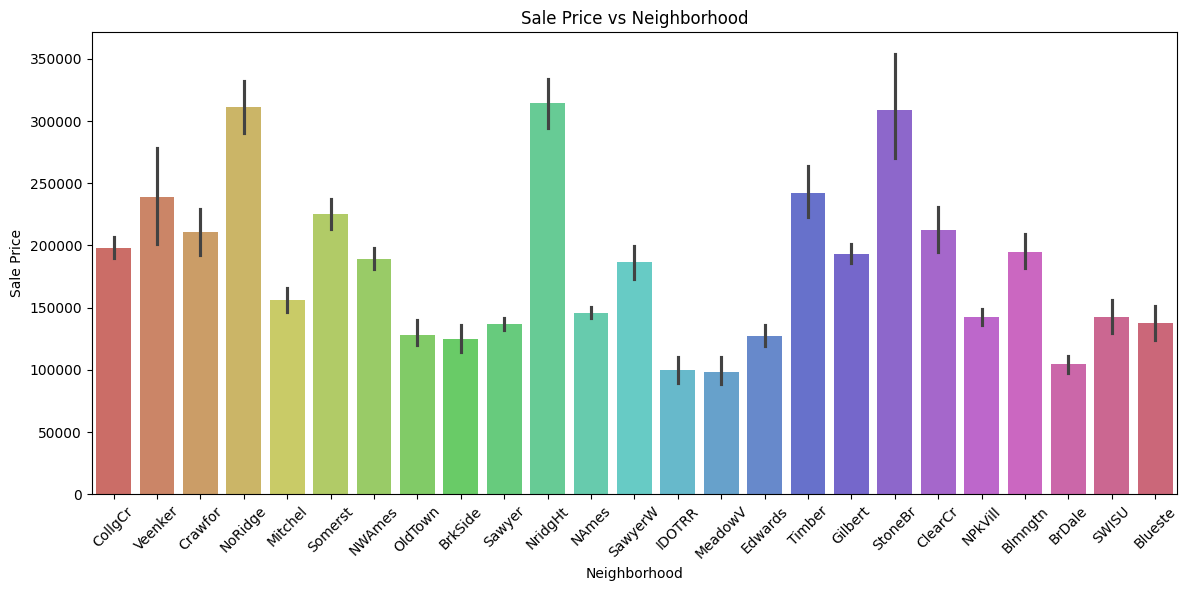

In [48]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Neighborhood", y="SalePrice", hue="Neighborhood", data=train_df, palette="hls", legend=False)
plt.xticks(rotation=45)
plt.title("Sale Price vs Neighborhood")
plt.ylabel("Sale Price")
plt.xlabel("Neighborhood")
plt.show()

KITCHEN QUALITY

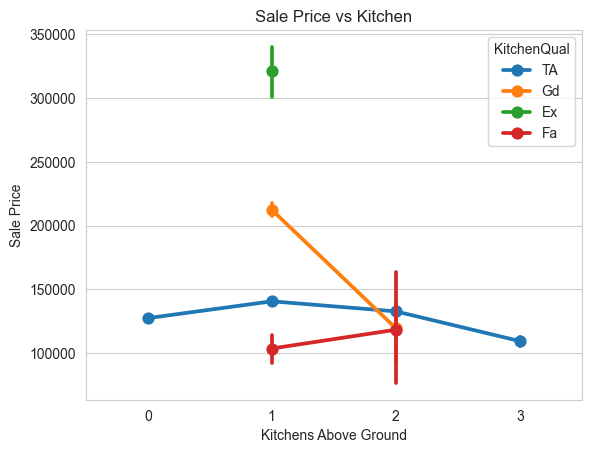

In [58]:
with sns.axes_style('whitegrid'):
    sns.pointplot(x="KitchenAbvGr", y="SalePrice", hue="KitchenQual", data=train_df)
    plt.title("Sale Price vs Kitchen")
    plt.ylabel("Sale Price")
    plt.xlabel("Kitchens Above Ground")
    plt.show()

OVERALL QUALITY

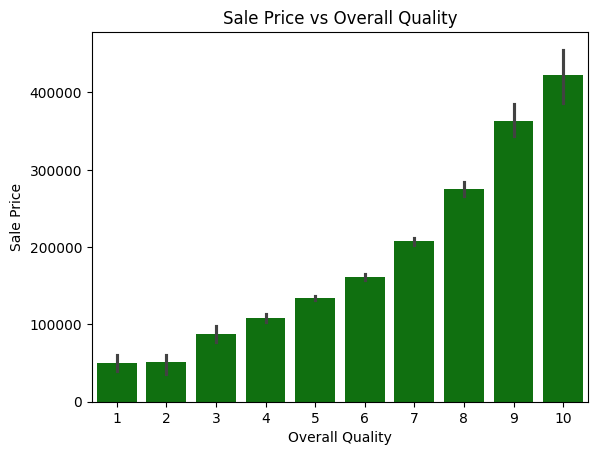

In [55]:

sns.barplot(x="OverallQual", y="SalePrice", data=train_df, color="green", legend=False)
plt.title("Sale Price vs Overall Quality")
plt.ylabel("Sale Price")
plt.xlabel("Overall Quality")
plt.show()